# 0.0 - Imports

In [1]:
import warnings

import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt

from sklearn import metrics as mt
from sklearn.linear_model import ElasticNet

In [2]:
warnings.filterwarnings('ignore')

# 1.0 - Load Data

In [3]:
# Train Dataset 
df_X_train = pd.read_csv( '../dataset/regressao/X_training.csv' )
df_y_train = pd.read_csv( '../dataset/regressao/y_training.csv' )

# Validation Dataset 
df_X_val = pd.read_csv( '../dataset/regressao/X_validation.csv' )
df_y_val = pd.read_csv( '../dataset/regressao/y_val.csv' )

# Validation Dataset 
df_X_test = pd.read_csv( '../dataset/regressao/X_test.csv' )
df_y_test = pd.read_csv( '../dataset/regressao/y_test.csv' )

# 2.0 - Linear Regression - ElasticNet

Parametros 
* l1_ratio
* max_iter
* alpha

## 2.1 - Performane for Train Dataset

In [4]:
# Define
elastic_net = ElasticNet( random_state=77 )

# Training
elastic_net.fit( df_X_train, df_y_train )

# Predict
y_pred_train = elastic_net.predict( df_X_train )

# Performance Metrics
r2_train = mt.r2_score( df_y_train, y_pred_train )
mse_train = mt.mean_squared_error( df_y_train, y_pred_train )
rmse_train = mt.mean_squared_error( df_y_train, y_pred_train, squared=False )
mae_train = mt.mean_absolute_error( df_y_train, y_pred_train )
mape_train = mt.mean_absolute_percentage_error( df_y_train, y_pred_train )

print( f'Train R2: {r2_train:.5}' )
print( f'Train MSE: {mse_train:.5}' )
print( f'Train RMSE: {rmse_train:.5}' )
print( f'Train MAE: {mae_train:.5}' )
print( f'Train MAPE: {mape_train:.5}' )


Train R2: 0.0078317
Train MSE: 474.27
Train RMSE: 21.778
Train MAE: 17.3
Train MAPE: 8.7323


## 2.2 - Performance for Validation Dataset

In [5]:
# Define
elastic_net = ElasticNet( random_state=77 )

# Training
elastic_net.fit( df_X_train, df_y_train )

# Predict
y_pred_val = elastic_net.predict( df_X_val )

# Performance Metrics
r2_val = mt.r2_score( df_y_val, y_pred_val )
mse_val = mt.mean_squared_error( df_y_val, y_pred_val )
rmse_val = mt.mean_squared_error( df_y_val, y_pred_val, squared=False )
mae_val = mt.mean_absolute_error( df_y_val, y_pred_val )
mape_val = mt.mean_absolute_percentage_error( df_y_val, y_pred_val )

print( f'Validation R2: {r2_val:.5}' )
print( f'Validation MSE: {mse_val:.5}' )
print( f'Validation RMSE: {rmse_val:.5}' )
print( f'Validation MAE: {mae_val:.5}' )
print( f'Validation MAPE: {mape_val:.5}' )


Validation R2: 0.0081171
Validation MSE: 473.64
Validation RMSE: 21.763
Validation MAE: 17.263
Validation MAPE: 8.694


## 2.3 - Hyperparameter Fine Tuning

L1 Ratio

In [6]:
l1_ratio = np.arange( 0.0, 1.0, 0.05 )

r2_list_l = []
mse_list_l = []
rmse_list_l = []
mae_list_l = []
mape_list_l = []

In [7]:
for l in l1_ratio:
    # Define
    elastic_net = ElasticNet( random_state=77, l1_ratio=l )
    # Training
    elastic_net.fit( df_X_train, df_y_train )
    # Predict
    y_pred = elastic_net.predict( df_X_val )

    # Performance Metrics
    r2 = mt.r2_score( df_y_val, y_pred )
    mse = mt.mean_squared_error( df_y_val, y_pred )
    rmse = mt.mean_squared_error( df_y_val, y_pred, squared=False )
    mae = mt.mean_absolute_error( df_y_val, y_pred )
    mape = mt.mean_absolute_percentage_error( df_y_val, y_pred )

    r2_list_l.append( r2 )
    mse_list_l.append( mse )
    rmse_list_l.append( rmse )
    mae_list_l.append( mae )
    mape_list_l.append( mape )

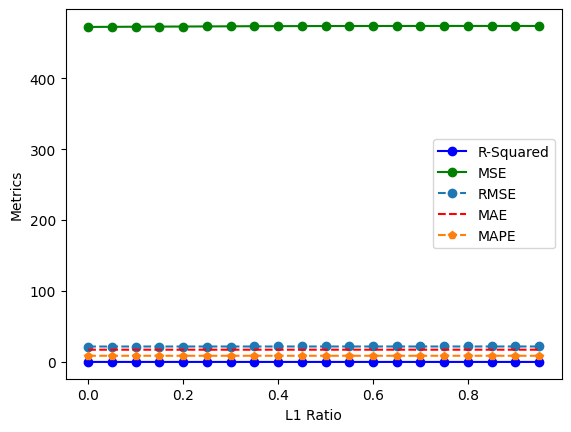

In [8]:
plt.plot( l1_ratio, r2_list_l, 'bo-', label='R-Squared')
plt.plot( l1_ratio, mse_list_l, 'go-', label='MSE')
plt.plot( l1_ratio, rmse_list_l, 'o--', label='RMSE')
plt.plot( l1_ratio, mae_list_l, 'r--', label='MAE')
plt.plot( l1_ratio, mape_list_l, 'p--', label='MAPE')
plt.xlabel( 'L1 Ratio' )
plt.ylabel( 'Metrics' )
plt.legend();

In [9]:
best_ratio = l1_ratio[ np.argmin( rmse_list_l) ]
best_ratio

0.0

Max iter

In [10]:
max_iter = np.arange( 100, 3100, 100 )

r2_list_m = []
mse_list_m = []
rmse_list_m = []
mae_list_m = []
mape_list_m = []

In [11]:
for m in max_iter:
    # Define
    elastic_net = ElasticNet( random_state=77, l1_ratio=best_ratio, max_iter=m )
    # Training
    elastic_net.fit( df_X_train, df_y_train )
    # Predict
    y_pred = elastic_net.predict( df_X_val )

    # Performance Metrics
    r2_m = mt.r2_score( df_y_val, y_pred )
    mse_m = mt.mean_squared_error( df_y_val, y_pred )
    rmse_m = mt.mean_squared_error( df_y_val, y_pred, squared=False )
    mae_m = mt.mean_absolute_error( df_y_val, y_pred )
    mape_m = mt.mean_absolute_percentage_error( df_y_val, y_pred )

    r2_list_m.append( r2_m )
    mse_list_m.append( mse_m )
    rmse_list_m.append( rmse_m )
    mae_list_m.append( mae_m )
    mape_list_m.append( mape_m )

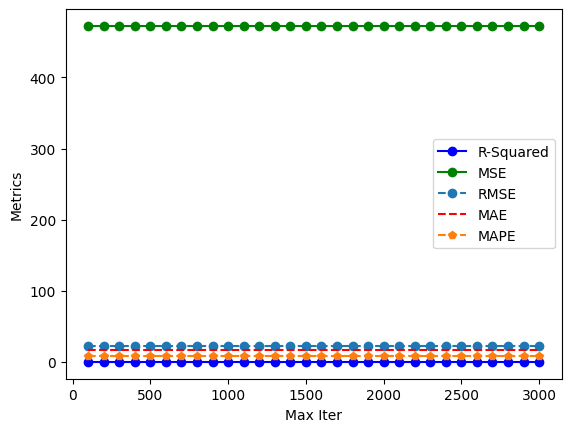

In [12]:
plt.plot( max_iter, r2_list_m, 'bo-', label='R-Squared')
plt.plot( max_iter, mse_list_m, 'go-', label='MSE')
plt.plot( max_iter, rmse_list_m, 'o--', label='RMSE')
plt.plot( max_iter, mae_list_m, 'r--', label='MAE')
plt.plot( max_iter, mape_list_m, 'p--', label='MAPE')
plt.xlabel( 'Max Iter' )
plt.ylabel( 'Metrics' )
plt.legend();

In [13]:
best_iter = max_iter[ np.argmin(rmse_list_m) ]
best_iter

100

Alpha

In [14]:
alpha = np.arange( 0, 10, 0.2 )

r2_list_a = []
mse_list_a = []
rmse_list_a = []
mae_list_a = []
mape_list_a = []

In [15]:
for a in alpha:
    # Define
    elastic_net = ElasticNet( random_state=77, l1_ratio=best_ratio, max_iter=best_iter, alpha=a )
    # Training
    elastic_net.fit( df_X_train, df_y_train )
    # Predict
    y_pred = elastic_net.predict( df_X_val )

    # Performance Metrics
    r2_a = mt.r2_score( df_y_val, y_pred )
    mse_a = mt.mean_squared_error( df_y_val, y_pred )
    rmse_a = mt.mean_squared_error( df_y_val, y_pred, squared=False )
    mae_a = mt.mean_absolute_error( df_y_val, y_pred )
    mape_a = mt.mean_absolute_percentage_error( df_y_val, y_pred )

    r2_list_a.append( r2_a )
    mse_list_a.append( mse_a )
    rmse_list_a.append( rmse_a )
    mae_list_a.append( mae_a )
    mape_list_a.append( mape_a )

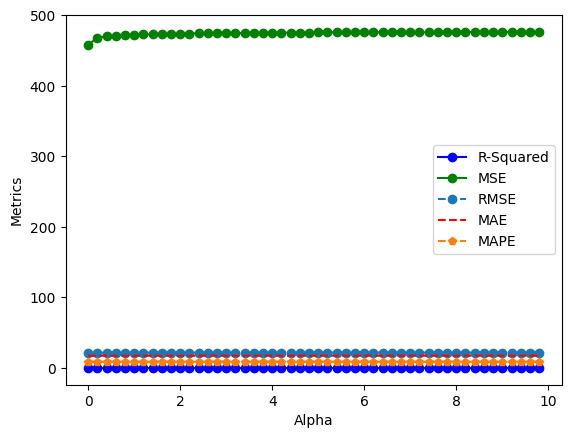

In [16]:
plt.plot( alpha, r2_list_a, 'bo-', label='R-Squared')
plt.plot( alpha, mse_list_a, 'go-', label='MSE')
plt.plot( alpha, rmse_list_a, 'o--', label='RMSE')
plt.plot( alpha, mae_list_a, 'r--', label='MAE')
plt.plot( alpha, mape_list_a, 'p--', label='MAPE')
plt.xlabel( 'Alpha' )
plt.ylabel( 'Metrics' )
plt.legend();

In [17]:
best_alpha = alpha[ np.argmin( rmse_list_a ) ]
best_alpha

0.0

## 2.4 - Performance for Test Dataset

In [18]:
# Define
elastic_net_test = ElasticNet( random_state=77, l1_ratio=best_ratio, max_iter=best_iter, alpha=best_alpha )

# Training
elastic_net_test.fit( np.concatenate(( df_X_train, df_X_val)), np.concatenate(( df_y_train, df_y_val)) )

# Predict
y_pred_test = elastic_net_test.predict( df_X_test )

# Performance Metrics
r2_test = mt.r2_score( df_y_test, y_pred_test )
mse_test = mt.mean_squared_error( df_y_test, y_pred_test )
rmse_test = mt.mean_squared_error( df_y_test, y_pred_test, squared=False )
mae_test = mt.mean_absolute_error( df_y_test, y_pred_test )
mape_test = mt.mean_absolute_percentage_error( df_y_test, y_pred_test )

print( f'Test R2: {r2_test:.7}' )
print( f'Test MSE: {mse_test:.7}' )
print( f'Test RMSE: {rmse_test:.7}' )
print( f'Test MAE: {mae_test:.7}' )
print( f'Test MAPE: {mape_test:.7}' )

Test R2: 0.05116552
Test MSE: 461.9884
Test RMSE: 21.49392
Test MAE: 17.1442
Test MAPE: 8.531355
